# CREDIT CARD APPROVAL PREDICTION

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Data Collection

In [2]:
df1 = pd.read_csv("application_record.csv")
df2 = pd.read_csv("credit_record.csv")
df = pd.merge(df1,df2)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


## Exploratory Data Analysis

In [3]:
df.shape

(777715, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
# Dropping any duplicates present
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# This helps to understand missing value in percentage
df.isnull().sum() / df.shape[0] * 100 

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.865806
CNT_FAM_MEMBERS         0.000000
MONTHS_BALANCE          0.000000
STATUS                  0.000000
dtype: float64

In [8]:
# Fill null value 
df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].fillna("Unknown")

In [9]:
df.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

## Data Pre-Processing

In [10]:
# First we will drop the unnecessary columns which relates to personal details
df.drop(columns= ["ID", "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"],inplace=True)
df.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [11]:
# We will change the names of the Cdataframe_columns
df = df.rename(columns={
    'CODE_GENDER': 'Gender',
    'FLAG_OWN_CAR': 'Owns_Car',
    'FLAG_OWN_REALTY': 'Owns_House',
    'CNT_CHILDREN': 'Num_Children',
    'AMT_INCOME_TOTAL': 'Annual_Income',
    'NAME_INCOME_TYPE': 'Income_Type',
    'NAME_EDUCATION_TYPE': 'Education_Level',
    'NAME_FAMILY_STATUS': 'Family_Status',
    'NAME_HOUSING_TYPE': 'Housing_Type',
    'DAYS_BIRTH': 'Age_Days',
    'DAYS_EMPLOYED': 'Employment_Duration_Days',
    'OCCUPATION_TYPE': 'Occupation',
    'CNT_FAM_MEMBERS': 'Family_Size',
    'MONTHS_BALANCE': 'Months_Balance',
    'STATUS': 'Payment_Status'
})

In [12]:
df.columns

Index(['Gender', 'Owns_Car', 'Owns_House', 'Num_Children', 'Annual_Income',
       'Income_Type', 'Education_Level', 'Family_Status', 'Housing_Type',
       'Age_Days', 'Employment_Duration_Days', 'Occupation', 'Family_Size',
       'Months_Balance', 'Payment_Status'],
      dtype='object')

### Analyzing the Numerical Columns

In [13]:
numerical_cols = ['Num_Children', 'Annual_Income','Age_Days', 'Employment_Duration_Days'
                  , 'Family_Size','Months_Balance']
df[numerical_cols]

,Num_Children,Annual_Income,Age_Days,Employment_Duration_Days,Family_Size,Months_Balance
0,0,427500.0,-12005,-4542,2.0,0
1,0,427500.0,-12005,-4542,2.0,-1
2,0,427500.0,-12005,-4542,2.0,-2
3,0,427500.0,-12005,-4542,2.0,-3
4,0,427500.0,-12005,-4542,2.0,-4
...,...,...,...,...,...,...
777710,0,112500.0,-9188,-1193,1.0,-9
777711,0,112500.0,-9188,-1193,1.0,-10
777712,0,112500.0,-9188,-1193,1.0,-11
777713,0,112500.0,-9188,-1193,1.0,-12


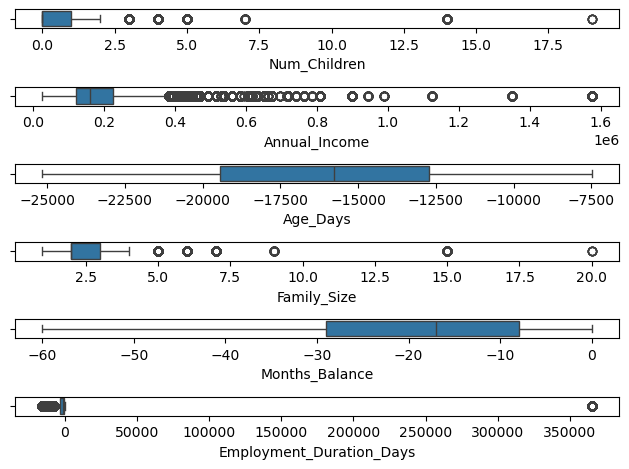

In [14]:
# Visualizing to find Outliers in the Data
plt.subplot(6,1,1)
sns.boxplot(x=df["Num_Children"])
plt.subplot(6,1,2)
sns.boxplot(x = df["Annual_Income"])
plt.subplot(6,1,3)
sns.boxplot(x=df["Age_Days"])
plt.subplot(6,1,4)
sns.boxplot(x = df["Family_Size"])
plt.subplot(6,1,5)
sns.boxplot(x=df["Months_Balance"])
plt.subplot(6,1,6)
sns.boxplot(x = df["Employment_Duration_Days"])
plt.tight_layout()
plt.show()


In [15]:
# Handling Outliers 
for i in numerical_cols:
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers 
    df[numerical_cols] = df[numerical_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)



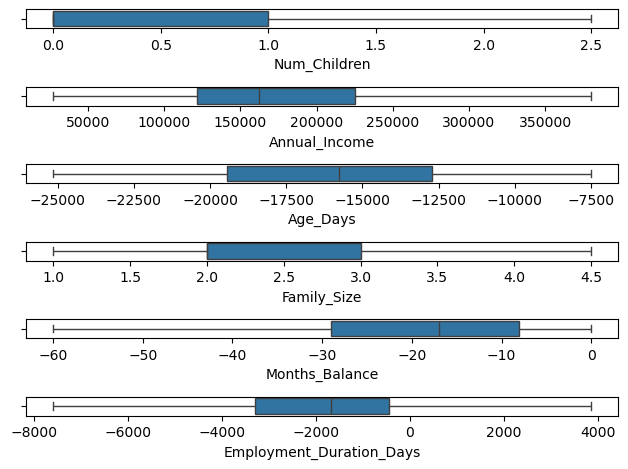

In [16]:
# Visualizing after removing outliers
plt.subplot(6,1,1)
sns.boxplot(x=df["Num_Children"])
plt.subplot(6,1,2)
sns.boxplot(x = df["Annual_Income"])
plt.subplot(6,1,3)
sns.boxplot(x=df["Age_Days"])
plt.subplot(6,1,4)
sns.boxplot(x = df["Family_Size"])
plt.subplot(6,1,5)
sns.boxplot(x=df["Months_Balance"])
plt.subplot(6,1,6)
sns.boxplot(x = df["Employment_Duration_Days"])
plt.tight_layout()
plt.show()

In [17]:
df.shape

(777715, 15)

In [18]:
# Drop the Duplicates because Cliping replaces the outliers with nearest valid bound and may create some duplicates
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(468850, 15)

In [20]:
# Creating new columns for Age , Employment Days and Month Balance
df['Age'] = (-df["Age_Days"] / 365).astype(int)
df["Employment Years"] = (df['Employment_Duration_Days'] / 365).astype(int).abs()
df['Years_Balance'] = (-df['Months_Balance'] / 12).astype(int)
df.drop(columns=["Age_Days", "Employment_Duration_Days","Months_Balance"], inplace=True)

In [21]:
df.head()

,Gender,Owns_Car,Owns_House,Num_Children,Annual_Income,Income_Type,Education_Level,Family_Status,Housing_Type,Occupation,Family_Size,Payment_Status,Age,Employment Years,Years_Balance
0,M,Y,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,Unknown,2.0,C,32,12,0
1,M,Y,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,Unknown,2.0,C,32,12,0
2,M,Y,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,Unknown,2.0,C,32,12,0
3,M,Y,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,Unknown,2.0,C,32,12,0
4,M,Y,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,Unknown,2.0,C,32,12,0


In [22]:
# Create A Approve Column from the Status Column 
df['Approved'] = df['Payment_Status'].replace({'X': 0, 'C': 0, '0': 0, '1': 0, '2': 1, '3': 1, '4': 1, '5': 1})
df.drop(columns="Payment_Status", inplace=True)

C:\Users\Prasad\AppData\Local\Temp\ipykernel_5408\2585141521.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Approved'] = df['Payment_Status'].replace({'X': 0, 'C': 0, '0': 0, '1': 0, '2': 1, '3': 1, '4': 1, '5': 1})


In [23]:
# We can see that the data is imbalanced and we will solve this before model development
df["Approved"].value_counts()

Approved
0    466303
1      2547
Name: count, dtype: int64

<Axes: >

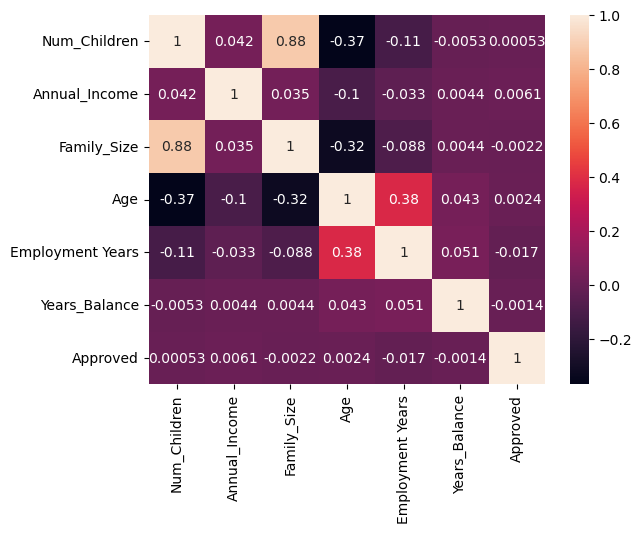

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot= True)

### Analyzing the Categorical Data

In [25]:
categorical_cols = ['Gender', 'Owns_Car', 'Owns_House',
       'Income_Type', 'Education_Level', 'Family_Status', 'Housing_Type',
       'Occupation']
for i in categorical_cols:
    print(i ,df[i].unique())

Gender ['M' 'F']
Owns_Car ['Y' 'N']
Owns_House ['Y' 'N']
Income_Type ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
Education_Level ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Family_Status ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
Housing_Type ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
Occupation ['Unknown' 'Security staff' 'Sales staff' 'Accountants' 'Laborers'
 'Managers' 'Drivers' 'Core staff' 'High skill tech staff'
 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'Medicine staff' 'Secretaries'
 'Waiters/barmen staff' 'HR staff' 'Realty agents' 'IT staff']


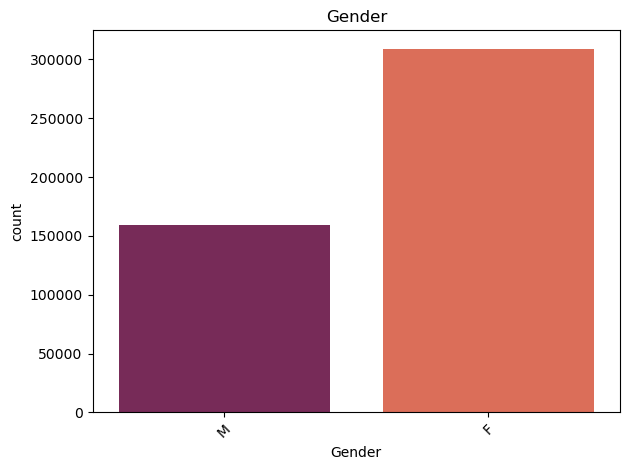

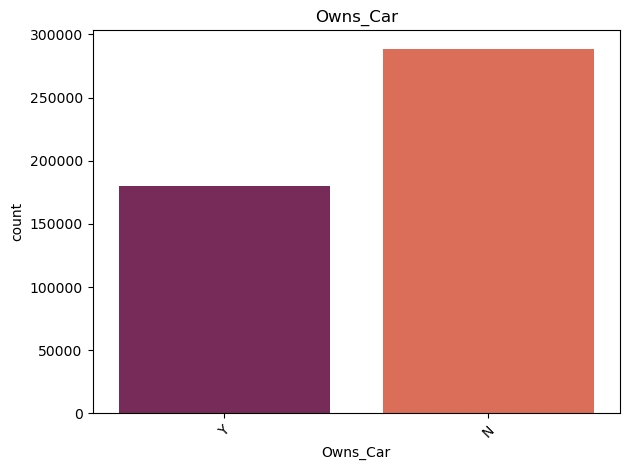

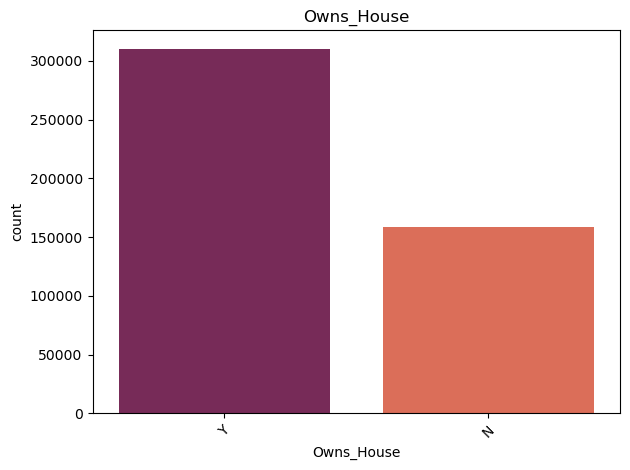

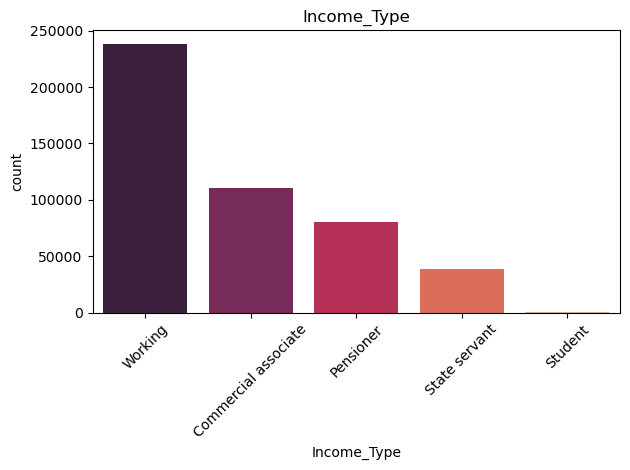

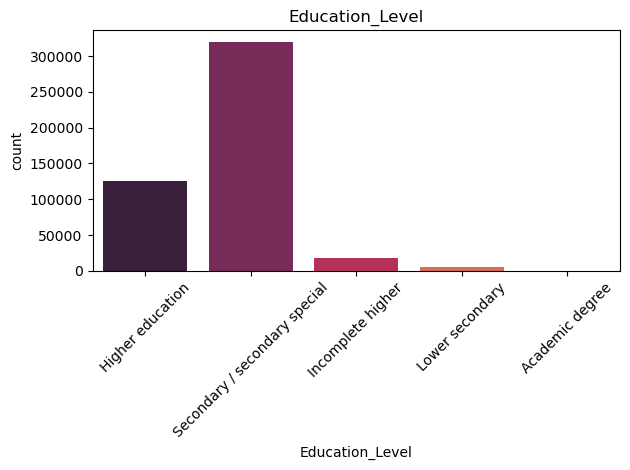

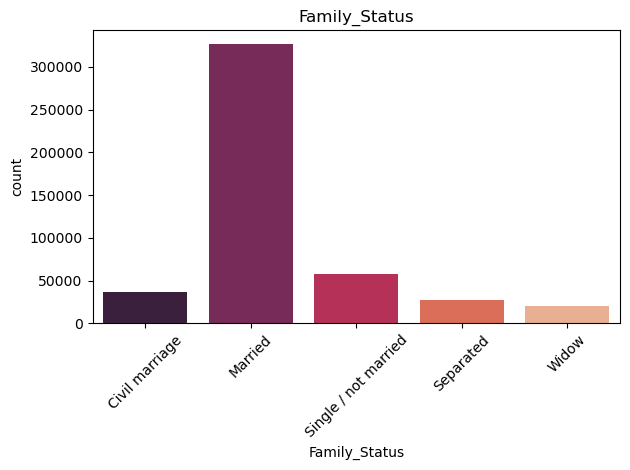

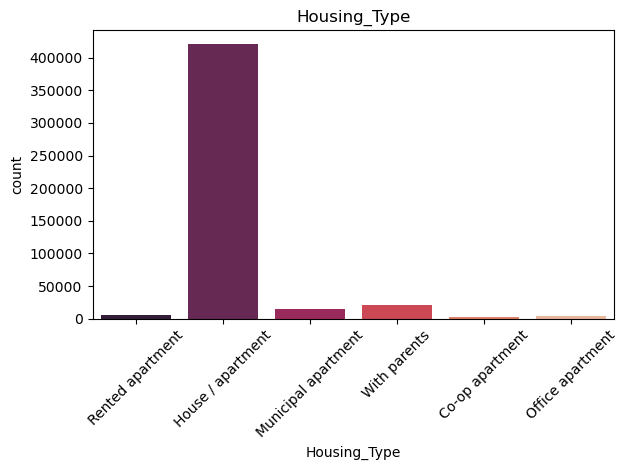

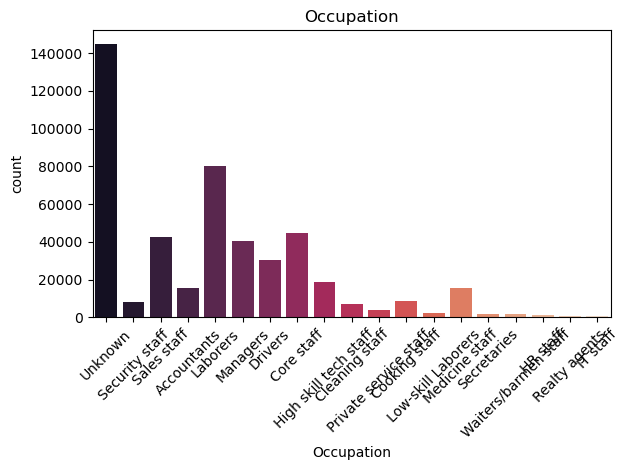

In [26]:
import warnings
warnings.filterwarnings("ignore")
for i in categorical_cols:
    plt.figure()
    sns.countplot(x = df[i], palette="rocket")
    plt.xticks(rotation=45)
    plt.title(i)
    plt.tight_layout()

## Encoding Data

In [27]:
# We will use OneHotEncoder for encoding data
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded)
df_encoded = df_encoded.astype(int)
df_encoded

,Num_Children,Annual_Income,Family_Size,Age,Employment Years,Years_Balance,Approved,Gender_F,Gender_M,Owns_Car_N,...,Occupation_Low-skill Laborers,Occupation_Managers,Occupation_Medicine staff,Occupation_Private service staff,Occupation_Realty agents,Occupation_Sales staff,Occupation_Secretaries,Occupation_Security staff,Occupation_Unknown,Occupation_Waiters/barmen staff
0,0,380250,2,32,12,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,380250,2,32,12,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,380250,2,32,12,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,380250,2,32,12,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,380250,2,32,12,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,0,112500,1,25,3,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
777711,0,112500,1,25,3,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
777712,0,112500,1,25,3,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
777713,0,112500,1,25,3,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## Scaling the Data

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ["Num_Children", "Annual_Income", "Family_Size", "Age", "Employment Years"]
df_encoded[cols] = scaler.fit_transform(df_encoded[cols])

df_encoded.head()

,Num_Children,Annual_Income,Family_Size,Age,Employment Years,Years_Balance,Approved,Gender_F,Gender_M,Owns_Car_N,...,Occupation_Low-skill Laborers,Occupation_Managers,Occupation_Medicine staff,Occupation_Private service staff,Occupation_Realty agents,Occupation_Sales staff,Occupation_Secretaries,Occupation_Security staff,Occupation_Unknown,Occupation_Waiters/barmen staff
0,-0.602609,2.457788,-0.211348,-1.03921,0.907028,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.602609,2.457788,-0.211348,-1.03921,0.907028,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.602609,2.457788,-0.211348,-1.03921,0.907028,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.602609,2.457788,-0.211348,-1.03921,0.907028,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.602609,2.457788,-0.211348,-1.03921,0.907028,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Balancing the Unbalanced Data

In [29]:
# Using Smote Because the data is Unbalanced and we need it to be Balanced for model training
from imblearn.over_sampling import SMOTE

X = df_encoded.drop(columns="Approved")
y = df_encoded["Approved"]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
y_resampled.value_counts()

Approved
0    466303
1    466303
Name: count, dtype: int64

## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

## Model Development

### 1) Logistic Regression

#### Model Building

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

#### Prediction Reports

Classification Report
               precision    recall  f1-score   support

           0       0.72      0.63      0.67    174612
           1       0.58      0.68      0.63    133148

    accuracy                           0.65    307760
   macro avg       0.65      0.65      0.65    307760
weighted avg       0.66      0.65      0.65    307760



<Axes: >

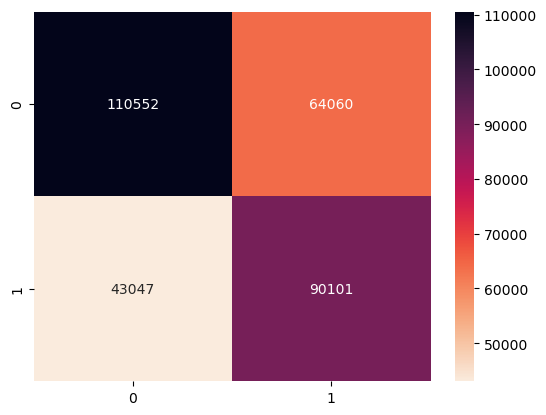

In [32]:
# Lets check the AccuracyScore, ClassificationReport and Confusion Matrix for the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
cr = classification_report(y_pred,y_test)
print("Classification Report\n", cr)
sns.heatmap(cm, annot=True,fmt='d', cmap='rocket_r')

#### Important Features from Logistic Regression

In [33]:
importance = model.coef_[0]   # coefficients for each feature

# Create dataframe of features and their importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': importance,
    'Abs_Coefficient': np.abs(importance)
})

# Sort by absolute importance
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

feature_importance.head(10)

,Feature,Coefficient,Abs_Coefficient
45,Occupation_Private service staff,-11.242933,11.242933
48,Occupation_Secretaries,-9.355069,9.355069
38,Occupation_HR staff,-8.740341,8.740341
46,Occupation_Realty agents,-7.353936,7.353936
14,Income_Type_State servant,-6.656051,6.656051
22,Family_Status_Civil marriage,-6.425329,6.425329
16,Income_Type_Working,-6.307072,6.307072
12,Income_Type_Commercial associate,-5.670399,5.670399
34,Occupation_Cleaning staff,-5.560466,5.560466
23,Family_Status_Married,-5.539696,5.539696


#### Cross Validation on Logistic Regression

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-validation scores: [0.65428207 0.65829049 0.66010798 0.65288091 0.64331094]
Mean Accuracy: 0.653774476566104


### 2) Random Forest Algorithm

#### Model Building

In [35]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

#### Prediction Reports

Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    150960
           1       1.00      0.98      0.99    156800

    accuracy                           0.99    307760
   macro avg       0.99      0.99      0.99    307760
weighted avg       0.99      0.99      0.99    307760



<Axes: >

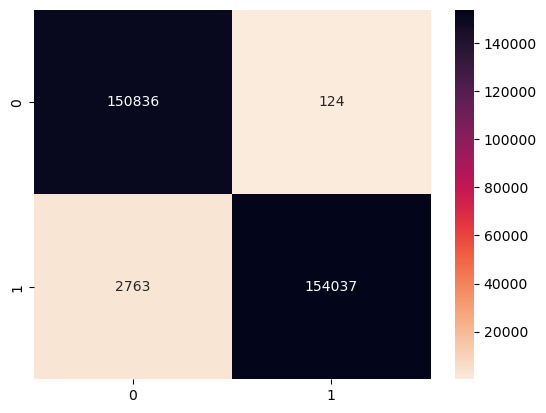

In [36]:
y_pred1 = model1.predict(X_test)
cm1 = confusion_matrix(y_pred1,y_test)
cr1 = classification_report(y_pred1,y_test)
print("Classification Report\n", cr1)
sns.heatmap(cm1, annot=True,fmt='d', cmap='rocket_r')

#### Important Features from Random Forest

In [37]:
importance = model1.feature_importances_

# Put into DataFrame
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance.head(10)

,Feature,Importance
3,Age,0.160110
1,Annual_Income,0.152600
4,Employment Years,0.123194
5,Years_Balance,0.059787
2,Family_Size,0.037325
0,Num_Children,0.028413
11,Owns_House_Y,0.023241
21,Education_Level_Secondary / secondary special,0.022185
50,Occupation_Unknown,0.021620
9,Owns_Car_Y,0.020939


#### Cross Validation on Random Forest

In [38]:
scores = cross_val_score(model1, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean Accuracy:", np.mean(scores))


Cross-validation scores: [0.98497764 0.98571206 0.98481136 0.98387313 0.95238606]
Mean Accuracy: 0.9783520515355983


## DONE